In [2]:
import os
import glob
from pathlib import Path

datapath = Path.cwd().parent / 'data' / 'hcaptcha'
subdirs = [x for x in datapath.iterdir() if x.is_dir()]

all_files = [
    f for subdir in subdirs for f in
    glob.glob(str(subdir / '*.png'))
]

print("total:", len(all_files))
for subdir in subdirs:
    files = glob.glob(str(subdir / '*.png'))
    print(f'{subdir.name}: {len(files)}')

total: 3545
binary-selection: 1605
object-detection: 335
image-selection: 1605


most_likely_class took 23.33 seconds


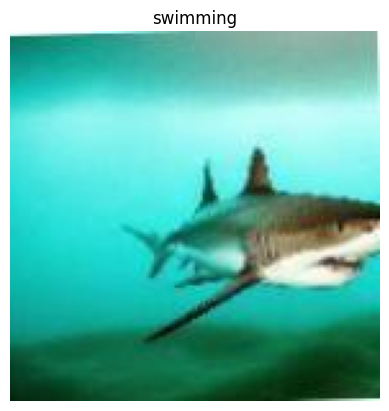

most_likely_class took 15.31 seconds


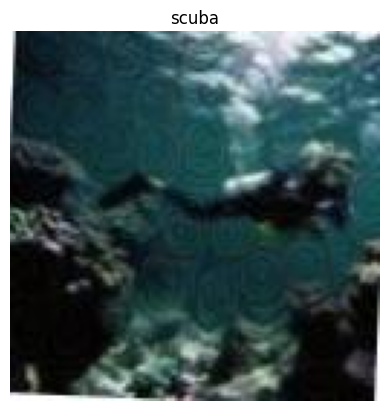

most_likely_class took 18.46 seconds


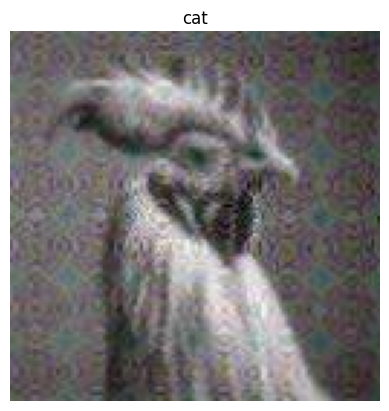

most_likely_class took 12.84 seconds


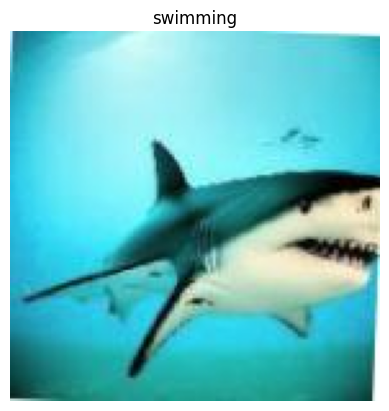

most_likely_class took 13.10 seconds


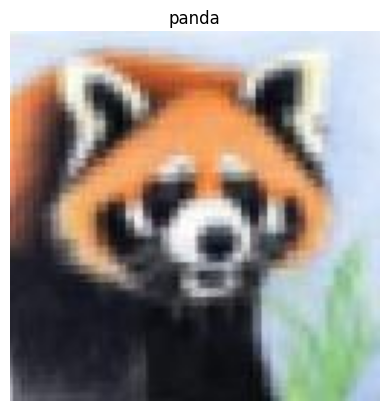

most_likely_class took 14.71 seconds


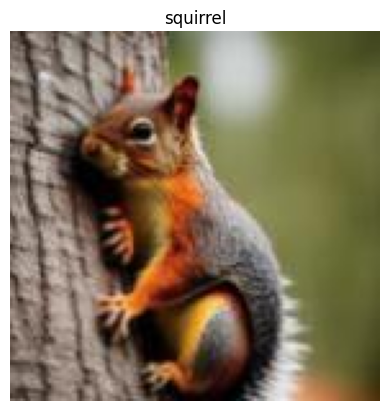

most_likely_class took 14.87 seconds


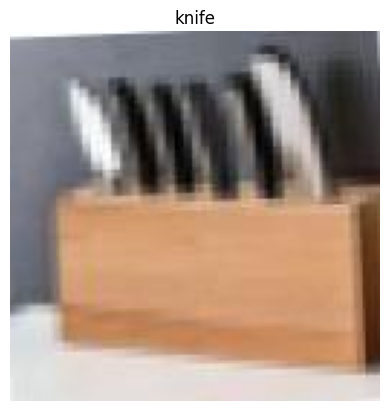

most_likely_class took 15.24 seconds


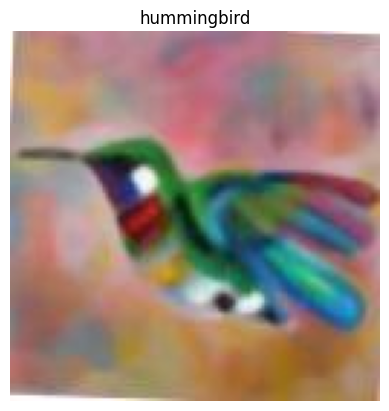

most_likely_class took 15.31 seconds


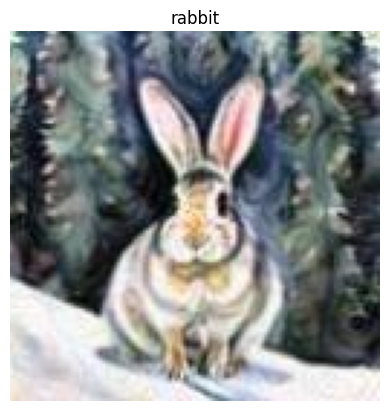

most_likely_class took 15.10 seconds


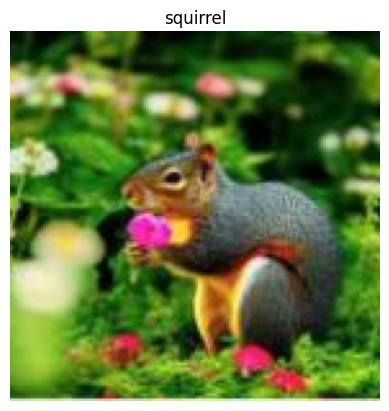

In [3]:
import random
import matplotlib.pyplot as plt
from PIL import Image

def time_it(func):
    import time
    import functools
    @functools.wraps(func)
    def wrapper(*args, **kwargs):
        start = time.time()ä
        result = func(*args, **kwargs)
        print(f'{func.__name__} took {time.time() - start:.2f} seconds')
        return result
    return wrapper

@time_it
def most_likely_class(img: Image.Image) -> str:
    from models.caption import caption_blip
    from models.cls import classify_metaclip
    caption: list[str] = caption_blip(img)
    probs: list[float] = classify_metaclip(img, caption)
    max_cls = max(zip(caption, probs), key=lambda x: x[1])

    # get longest word if multiple words
    max_cls = max_cls[0].split(' ')
    max_cls = max(max_cls, key=len)

    # strip non-alphanumeric characters
    max_cls = ''.join(filter(str.isalnum, max_cls))
    return max_cls

ten_rand_images = random.sample(all_files, 10)
for file in ten_rand_images:
    img = Image.open(file)
    plt.imshow(img)
    plt.title(most_likely_class(img))
    plt.axis('off')
    plt.show()